In [11]:
from inv_set.cartpole import basic
from inv_set.cartpole import trap
from envs.cartpole import Cartpole
import numpy as np
import matplotlib.pyplot as plt
from filters.disc import disc
from controllers.QP import QP_CBF_controller
import time
from inv_set.jet import diff_game
from envs.MooreGreitzerJet import jet

In [13]:
#inv_set = basic(3, 0.5, 5, 10, 10)
inv_set = trap(0.5, -5)
env = Cartpole(inv_set, 1)

In [14]:
path_to_diff_game = 'inv_set/jet_is_ser.pkl'
inv_set = diff_game(path_to_diff_game)

# initialize system
u_max = 0.01
d_max = 0.02
sys_dt = 0.01
disc_dt = 0.1

env = jet(u_max, d_max, sys_dt, disc_dt, inv_set)

In [15]:

def verify(env, num_traj, num_steps):
    initial_states = env.sample_states(30000)
    verified_states = []
    for initial_state in initial_states:
        for traj in range(num_traj):
            steps = 0
            state = env.reset(initial_state)
            term = False
            verified = False
            while not term and steps <= num_steps:
                u = env.action_space.sample()
                state, reward, term, info = env.step(u)
                if env.inv_set.forward(state) < 0:
                    break
                if term or steps == 50:
                    verified_states.append(initial_state)
                    verified = True
                    break
            if verified:
                break
    return np.array(initial_states), np.array(verified_states)




In [16]:
init_states, ver_states = verify(env, 5000, 200)
print(init_states.shape, ver_states.shape)

AttributeError: 'jet' object has no attribute 'reset'

Text(0, 0.5, '$\\dot{x}$')

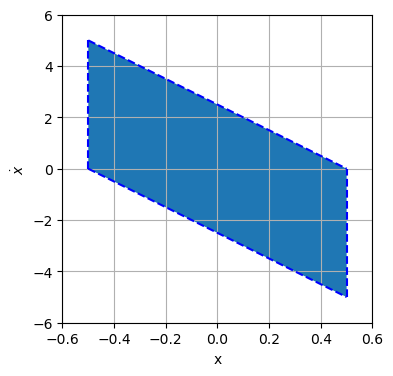

In [4]:
n = 50
x = np.linspace(-0.5, 0.5, n)
y = np.linspace(0, 5, n)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x, -5*(x-0.5),'--', c='b')
plt.plot(x, -5*(x+0.5),'--', c='b')
plt.plot([-0.5]*n, y,'--', c='b')
plt.plot([0.5]*n, y-5, '--', c='b')
plt.fill_between(x, -5*(x-0.5), -5*(x+0.5))
plt.grid()
plt.xlim(-0.6, 0.6)
plt.ylim(-6, 6)
fig.set_size_inches(4,4)
plt.xlabel('x')
plt.ylabel('$\dot{x}$')

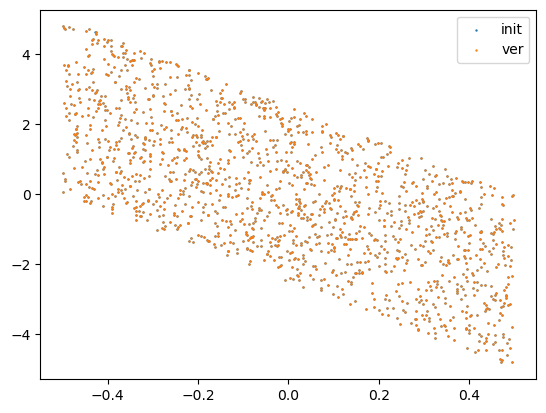

In [5]:
plt.scatter(init_states[:, 0], init_states[:, 1], s=0.5, label='init')
plt.scatter(ver_states[:, 0], ver_states[:, 1], s=0.5, label='ver')
plt.legend()

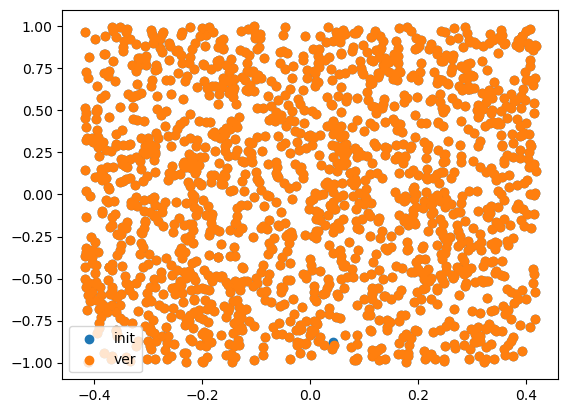

In [6]:
plt.scatter(init_states[:, 2], init_states[:, 3], label='init')
plt.scatter(ver_states[:, 2], ver_states[:, 3], label='ver')
plt.legend()

In [ ]:
env = Cartpole(inv_set)
num_states = 1000
num_inputs = 100
states, inputs, input_labels = env.sample_data(num_states, num_inputs)

In [ ]:
for i in range(num_states):
    state = states[i]
    input = inputs[i]
    input_label = input_labels[i]
    if -1 in input_label:
        pos_idx = input_label > 0
        neg_idx = input_label < 0
        a, b = env.label_state(input, input_label)
        print(a,b)
        plt.scatter(input[pos_idx], [1]*len(input[pos_idx]))
        plt.scatter(input[neg_idx], [-1]*len(input[neg_idx]))
        plt.scatter(b/a, 0)
        break

In [ ]:
import time
disc_filter = disc(env, 1000)
def target(state, t):
    return 0.5
disc_controller = QP_CBF_controller(target, disc_filter, 1)
env = Cartpole(inv_set)
state = env.reset()
done = False
total_reward = 0
step = 0
while not done and step <= 500:
    action = disc_controller.forward(state, step)
    action = np.float32(action)
    if action > 1:
        action = np.array([1], dtype=np.float32)
    elif action < -1:
        action = np.array([-1], dtype=np.float32)
    state, reward, done, info = env.step(action)
    total_reward += reward
    env.render()
    time.sleep(0.001)
    step += 1
env.reset()
env.close()

In [10]:
path_to_diff_game = 'inv_set/jet_is_ser.pkl'
inv_set = diff_game(path_to_diff_game)

# initialize system
u_max = 0.01
d_max = 0.02
sys_dt = 0.01
disc_dt = 0.1

env = jet(u_max, d_max, sys_dt, disc_dt, inv_set)